# UCI Adult Data Set

In [1]:
import sys
print(sys.version)

import pandas as pd

from IPython.display import display

%pylab inline

3.6.7 |Anaconda custom (64-bit)| (default, Oct 23 2018, 14:01:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Populating the interactive namespace from numpy and matplotlib


## 1. Exploration

Data read successfully!


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,ann_salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Number of data points = 32561
Number of features = 14
Number of ann_salary >50K =  7841
Number of ann_salary <=50K =  24720
Number of sex Male = 21790
Number of sex Female = 10771


,Male,Female
>50K,6662,1179
<=50K,15128,9592



Proportion Male with ann_salary >50K = 30.57%
Proportion Female with ann_salary >50K = 10.95%

bias factor = 2.7931201565097634


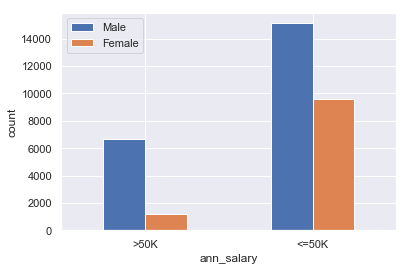

In [2]:
from plots import basic_stats

data_df = pd.read_csv('../data/preprocessed/adult-data.csv', na_values='?')
print('Data read successfully!')

display(data_df.head())

bias_name = 'sex'
target_name = 'ann_salary'
pos_target = '>50K'

basic_stats(data_df, bias_name, target_name, pos_target)

## 2. Preparing the Data

### 2.1 Converting categorical columns to binary

There are several non-numeric columns that need to be converted. Many of them are can be reasonably converted into `1`/`0` (binary) values.

Other columns are categorical variables with more than two values. We create as many columns as possible values and assign a `1` to one of them and `0` to all others. We  use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function for this transformation.

### 2.2 Removing redundant data columns

Remove redundant data columns of our choice
- We note that preprocessing the non-numeric (categorical) data columns into binary data columns has resulted in a number of redundant data columns which are entirely dependent on other columns
- This means that 9 of the 107 columns can be deleted without any loss of data
- For the non-numeric binary columns we can remove any one of the two binary columns created
- For the multiclass columns, we remove the binary column which is least popular

In [3]:
from data import preprocess_data
from data import remove_redundant_cols

data_df, categories = preprocess_data(data_df)
remove_redundant_cols(data_df, categories, target_name, pos_target)

display(data_df.head())

,age,workclass is Federal-gov,workclass is Local-gov,workclass is Private,workclass is Self-emp-inc,workclass is Self-emp-not-inc,workclass is State-gov,workclass is Without-pay,fnlwgt,education is 10th,...,country is Puerto-Rico,country is Scotland,country is South,country is Taiwan,country is Thailand,country is Trinadad&Tobago,country is United-States,country is Vietnam,country is Yugoslavia,ann_salary is >50K
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,1,0,0,0
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,1,0,0,0
2,38,0,0,1,0,0,0,0,215646,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,0,1,0,0,0,0,234721,0,...,0,0,0,0,0,0,1,0,0,0
4,28,0,0,1,0,0,0,0,338409,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 Post-processing exploration

ann_salary is >50K                      1.000000
marital_status is Married-civ-spouse    0.444696
relationship is Husband                 0.401035
education_num                           0.335154
marital_status is Never-married        -0.318440
age                                     0.234037
hours_per_week                          0.229689
relationship is Own-child              -0.228532
capital_gain                            0.223329
sex is Male                             0.215980
Name: ann_salary is >50K, dtype: float64

sex is Male                             1.000000
relationship is Husband                 0.580135
marital_status is Married-civ-spouse    0.431805
relationship is Unmarried              -0.321273
relationship is Wife                   -0.319311
occupation is Adm-clerical             -0.263148
hours_per_week                          0.229309
marital_status is Divorced             -0.228621
occupation is Craft-repair              0.223128
ann_salary is >50K                      0.215980
Name: sex is Male, dtype: float64

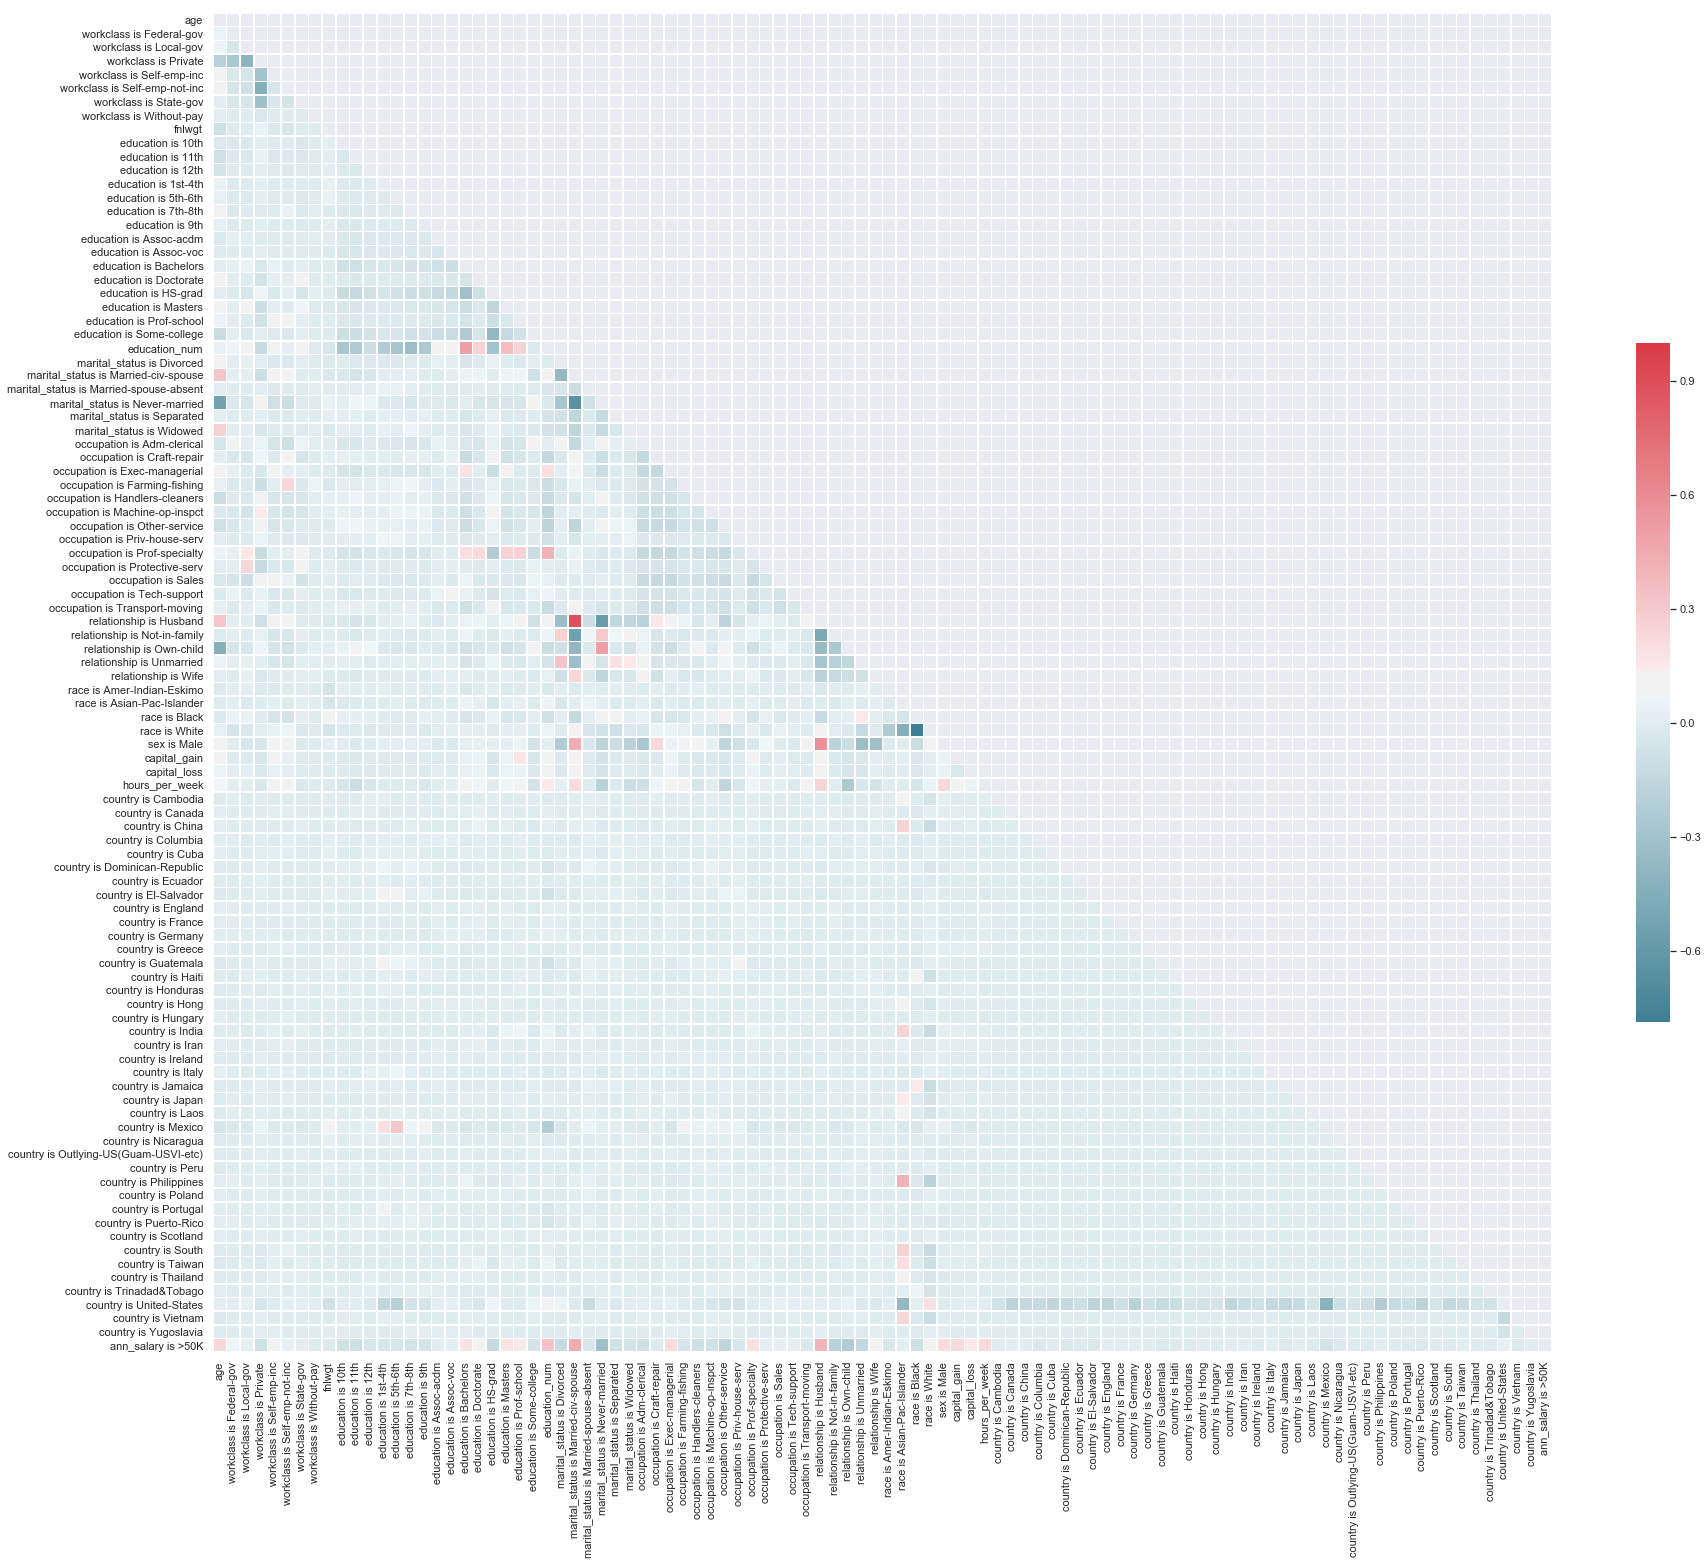

In [4]:
from explore import top_n_correlated_features
from plots import correlation_heatmap

bias_col = bias_name+' is '+categories[bias_name][1]
target_col = target_name+' is '+categories[target_name][1]

display(top_n_correlated_features(data_df, target_col, 10))
display(top_n_correlated_features(data_df, bias_col, 10))
correlation_heatmap(data_df)

### 2.4 Separate features and labels

In [5]:
# Extract feature (X) and target (y) columns

feature_cols = list(data_df.columns)
feature_cols.remove(target_col) # leave bias_col in features

print("Number feature columns: ", len(feature_cols))
print("Target column: ",target_col)
print("Bias column: ",bias_col)

X_all = data_df[feature_cols]
y_all = data_df[target_col]
z_all = data_df[bias_col]

Number feature columns:  97
Target column:  ann_salary is >50K
Bias column:  sex is Male


### 2.5 Splitting data into training and test sets

In [6]:
from train_test import make_training_and_test_sets
from train_test import normalise
from oversample import oversample

# Splitting the original dataset into training and testing parts
n_train = 30000
X_train, X_train2, X_train1, X_test, y_train, y_train2, y_train1, y_test, z_train, z_test = make_training_and_test_sets(X_all, y_all, z_all, n_train)
X_train, X_train2, X_train1, X_test = normalise(X_train,  X_train2,  X_train1,  X_test)

print("Training set: {} samples".format(X_train.shape[0]))
print("Test set: {} samples".format(X_test.shape[0]))
print("")

# Oversampling to address bias in the training dataset
X_new, y_new, z_new = oversample(X_train, y_train, z_train, target_col, categories[bias_name])

# Work out how many data point we need to train from our augmented dataset ()
new_n_train = X_new.shape[0]*n_train/X_all.shape[0]
new_n_train = int(new_n_train - new_n_train%3)

X_train_new, X_train2_new, X_train1_new, X_test_new, y_train_new, y_train2_new, y_train1_new, y_test_new, z_train_new, z_test_new = make_training_and_test_sets(X_new, y_new, z_new, new_n_train)

print("")
print("Augmented training set: {} samples".format(X_train_new.shape[0]))
print("Augmented test set: {} samples".format(X_test_new.shape[0]))
print("")
print(bias_name, categories[bias_name])
print(target_name, categories[target_name])

Training set: 30000 samples
Test set: 2561 samples

Proportion of Female for which ann_salary is >50K:  10.89%
Proportion of Male for which ann_salary is >50K:  30.62%
Should have  33045.0  data points: 33045

Augmented training set: 30444 samples
Augmented test set: 2601 samples

sex ['Female', 'Male']
ann_salary ['<=50K', '>50K']


## 3 Training a 3 layer neural network...

### 3.1 On all the data

Using TensorFlow backend.


,10000,20000,30000
Training time,23.410755,40.649755,65.601459
Prediction time,0.043834,0.051922,0.048730
F1 score (train),0.704949,0.714071,0.715199
F1 score (test),0.665477,0.662489,0.673647
Precision (train),0.804904,0.807279,0.793820
Precision (test),0.740079,0.740000,0.729679
Recall (train),0.627076,0.640158,0.650748
Recall (test),0.604538,0.599676,0.625608
Accuracy (train),0.873600,0.876550,0.875200
Accuracy (test),0.853573,0.852792,0.853963


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Female,Male
<=50K,755,1277
>50K,70,459


Proportion Female with ann_salary >50K = 8.48%
Proportion Male with ann_salary >50K = 26.44%
bias factor = 3.1161537195523366


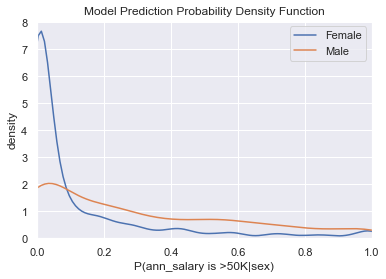

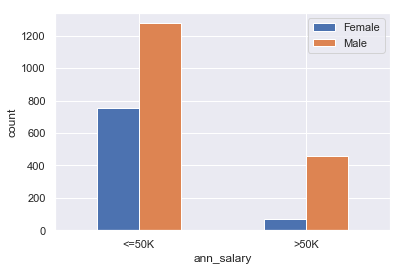

In [7]:
from train_test import make_results_df
from model import nn_classifier
from train_test import train_predict
from plots import probability_density_function
from plots import get_bias_factor

results_df = make_results_df(n_train)

# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1, y_train1, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train2, y_train2, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train, y_train, X_test, y_test, results_df)

display(results_df)
probability_density_function(y_pred, z_test, target_col, bias_name, categories[bias_name], 'all-data-dist')
get_bias_factor(y_pred, z_test, target_name, bias_name, categories, 'all-data-hist')

### 3.2 With gender information removed

,10000,20000,30000
Training time,23.893562,44.032354,66.055200
Prediction time,0.042004,0.043857,0.044306
F1 score (train),0.713350,0.723856,0.722534
F1 score (test),0.667811,0.674740,0.688097
Precision (train),0.782070,0.784485,0.787078
Precision (test),0.709854,0.723562,0.741573
Recall (train),0.655731,0.671927,0.667774
Recall (test),0.630470,0.632091,0.641815
Accuracy (train),0.873100,0.876550,0.876500
Accuracy (test),0.848887,0.853182,0.859820


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Female,Male
<=50K,749,1278
>50K,76,458


Proportion Female with ann_salary >50K = 9.21%
Proportion Male with ann_salary >50K = 26.38%
bias factor = 2.8638885520252244


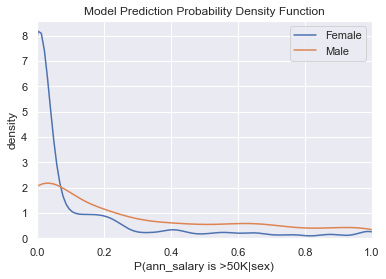

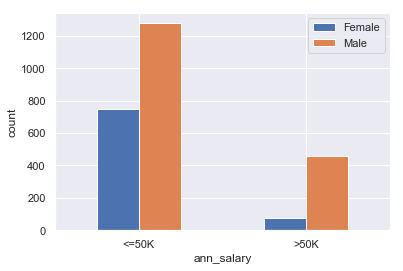

In [8]:
clf_nn = nn_classifier(n_features=X_train[X_train.columns.difference([bias_col])].shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1[X_train1.columns.difference([bias_col])], y_train1, X_test[X_test.columns.difference([bias_col])], y_test, results_df)
y_pred = train_predict(clf_nn, X_train2[X_train2.columns.difference([bias_col])], y_train2, X_test[X_test.columns.difference([bias_col])], y_test, results_df)
y_pred = train_predict(clf_nn, X_train[X_train.columns.difference([bias_col])], y_train, X_test[X_test.columns.difference([bias_col])], y_test, results_df)

display(results_df)
probability_density_function(y_pred, z_test, target_col, bias_name, categories[bias_name], 'no-sex-data-dist')
get_bias_factor(y_pred, z_test, target_name, bias_name, categories, 'no-sex-data-hist')


### 3.3 Training after upsampling well paid women

,10148,20296,30444
Training time,24.826405,45.637699,66.165634
Prediction time,0.043024,0.078908,0.043535
F1 score (train),0.784892,0.784642,0.786329
F1 score (test),0.702222,0.715667,0.715135
Precision (train),0.802985,0.812989,0.839817
Precision (test),0.720991,0.746972,0.767376
Recall (train),0.767597,0.758205,0.739245
Recall (test),0.684406,0.686881,0.669554
Accuracy (train),0.869235,0.870664,0.875148
Accuracy (test),0.819685,0.830450,0.834295


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Female,Male
<=50K,723,1173
>50K,310,395


Proportion Female with ann_salary >50K = 30.01%
Proportion Male with ann_salary >50K = 25.19%
bias factor = 0.8394400098749178


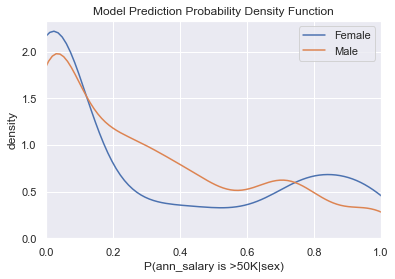

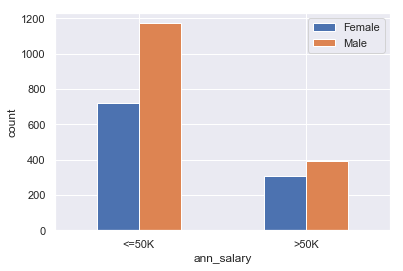

In [9]:
results_df = make_results_df(new_n_train)

# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1_new, y_train1_new, X_test_new, y_test_new, results_df)
y_pred = train_predict(clf_nn, X_train2_new, y_train2_new, X_test_new, y_test_new, results_df)
y_pred = train_predict(clf_nn, X_train_new, y_train_new, X_test_new, y_test_new, results_df)

display(results_df)
probability_density_function(y_pred, z_test_new, target_col, bias_name, categories[bias_name], 'fair-data-dist')
get_bias_factor(y_pred, z_test_new, target_name, bias_name, categories, 'fair-data-hist')

,10148,20296,30444
Training time,24.708127,45.052170,68.916391
Prediction time,0.043638,0.092130,0.044962
F1 score (train),0.778634,0.777262,0.784246
F1 score (test),0.654810,0.670588,0.677178
Precision (train),0.825053,0.830270,0.829093
Precision (test),0.653226,0.696335,0.693878
Recall (train),0.737159,0.730617,0.744002
Recall (test),0.656402,0.646677,0.661264
Accuracy (train),0.869728,0.869876,0.872783
Accuracy (test),0.833268,0.846935,0.848106


/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,Female,Male
<=50K,703,1270
>50K,122,466


Proportion Female with ann_salary >50K = 14.79%
Proportion Male with ann_salary >50K = 26.84%
bias factor = 1.8152243710810605


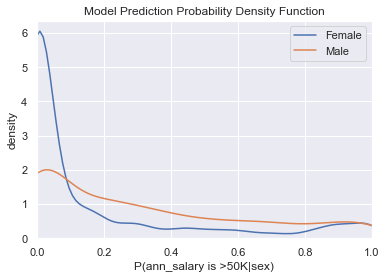

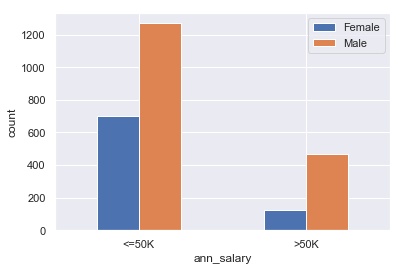

In [10]:
# initialise NeuralNet Classifier
clf_nn = nn_classifier(n_features=X_train_new.shape[1])
print(clf_nn)

# Train on different size training sets and predict on a separate test set
y_pred = train_predict(clf_nn, X_train1_new, y_train1_new, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train2_new, y_train2_new, X_test, y_test, results_df)
y_pred = train_predict(clf_nn, X_train_new, y_train_new, X_test, y_test, results_df)

display(results_df)
probability_density_function(y_pred, z_test, target_col, bias_name, categories[bias_name], 'fair-algo-dist')
get_bias_factor(y_pred, z_test, target_name, bias_name, categories, 'fair-algo-hist')